### Import modules

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set number of columns to show 
pd.set_option('display.max_rows', 100)
# plt.style.use("ggplot")
# pd.set_option('max_columns', None)

### Read CSV file

In [30]:
df = pd.read_csv('space_missions.csv', encoding='latin-1')

In [31]:
df.head(13)

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure
5,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-03-05,18:27:00,Juno I,Explorer 2,Retired,NaN,Failure
6,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-03-17,12:15:00,Vanguard,Vanguard 1,Retired,NaN,Success
7,AMBA,"LC-5, Cape Canaveral AFS, Florida, USA",1958-03-26,17:38:00,Juno I,Explorer 3,Retired,NaN,Success
8,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-04-27,09:01:00,Sputnik 8A91,Sputnik-3 #1,Retired,NaN,Failure
9,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-04-28,02:53:00,Vanguard,Vanguard TV5,Retired,NaN,Failure


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company        4630 non-null   object
 1   Location       4630 non-null   object
 2   Date           4630 non-null   object
 3   Time           4503 non-null   object
 4   Rocket         4630 non-null   object
 5   Mission        4630 non-null   object
 6   RocketStatus   4630 non-null   object
 7   Price          1265 non-null   object
 8   MissionStatus  4630 non-null   object
dtypes: object(9)
memory usage: 325.7+ KB


### Data preparation Functions


In [33]:
# Convert data type function
def set_data(df):
    df['Date'] = pd.to_datetime(df['Date']).dt.date
    df['Time'] = pd.to_datetime(df['Time'].astype(str))
    df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''))
#   df['RocketStatus'] = df['RocketStatus'].astype('bool') <=== Optional
    df['Year'] = pd.to_datetime(df['Date']).dt.year
    df['Country'] = df['Location'].apply(lambda x: x.split(',')[-1].strip())
    return df

# Duplicate data function
def remove_deuplicate(df):
    df = df.loc[~df.duplicated(subset= ['Date', 'Rocket', 'Mission'])].reset_index(drop=True)
    return df

# Remove None values 
def remove_none(df):
    df['Price'] = df['Price'].replace(',', '').fillna('0')
    df['Time'] = df['Time'].replace('0', '00:00:00')
    return df

### Initiate Data preparation


In [34]:
df = remove_none(df)

In [35]:
df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company        4630 non-null   object
 1   Location       4630 non-null   object
 2   Date           4630 non-null   object
 3   Time           4503 non-null   object
 4   Rocket         4630 non-null   object
 5   Mission        4630 non-null   object
 6   RocketStatus   4630 non-null   object
 7   Price          4630 non-null   object
 8   MissionStatus  4630 non-null   object
dtypes: object(9)
memory usage: 325.7+ KB


In [36]:
df = remove_deuplicate(df)

In [37]:
df.duplicated().sum()

0

In [38]:
df.shape

(4629, 9)

In [39]:
df = set_data(df)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4629 entries, 0 to 4628
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Company        4629 non-null   object        
 1   Location       4629 non-null   object        
 2   Date           4629 non-null   object        
 3   Time           4502 non-null   datetime64[ns]
 4   Rocket         4629 non-null   object        
 5   Mission        4629 non-null   object        
 6   RocketStatus   4629 non-null   object        
 7   Price          4629 non-null   float64       
 8   MissionStatus  4629 non-null   object        
 9   Year           4629 non-null   int64         
 10  Country        4629 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 397.9+ KB


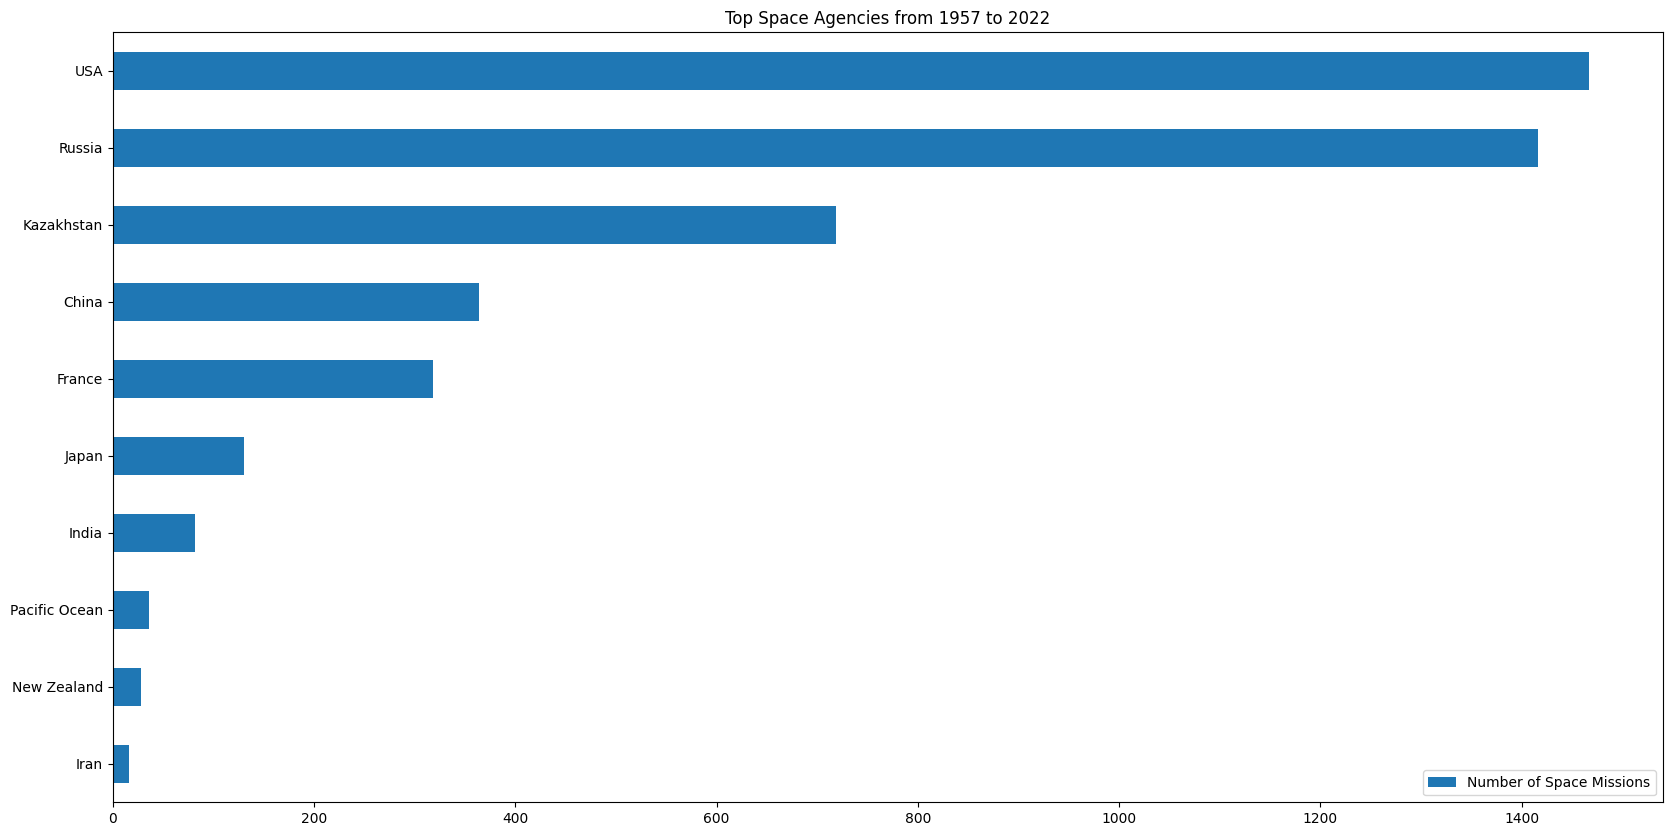

In [42]:
# Top 10 Space Agencies from 1957 to 2022 (Most Missions)
no_of_mission=df['Country'].value_counts().head(10).sort_values().plot(kind='barh',
                                                                       figsize=(20,10), 
                                                                       label='Number of Space Missions',
                                                                       title='Top Space Agencies from 1957 to 2022')
plt.legend()
plt.show()

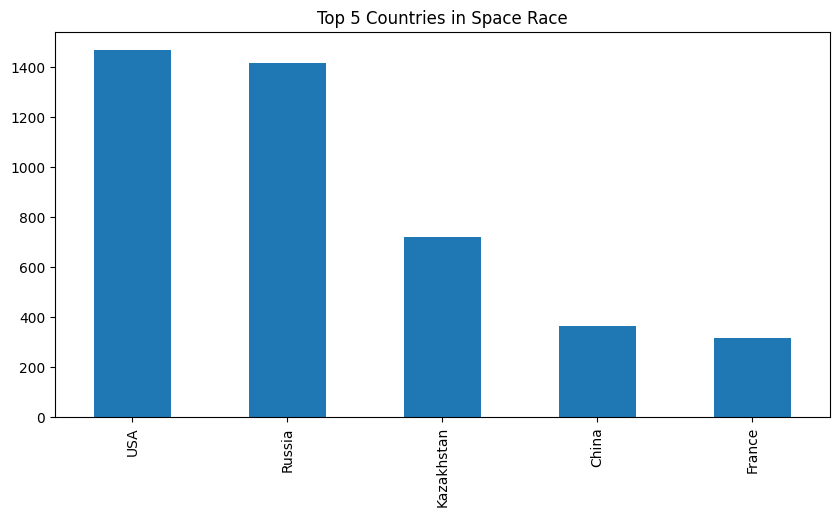

In [43]:
# Top 5 Countries with high space missions
df['Country'].value_counts().head(5).plot(
    kind='bar', 
    figsize=(10,5), 
    title ='Top 5 Countries in Space Race')

plt.show()

<AxesSubplot: title={'center': 'Top 5 active Space agencies in USA'}, xlabel='Companies', ylabel='Number of Missions'>

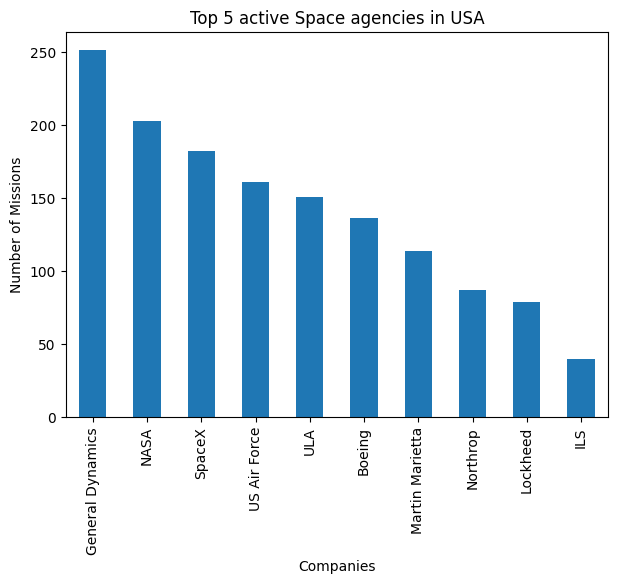

In [44]:
# USA Top Space agencies
usa = df.loc[df['Country'].isin(['USA'])].reset_index(drop=True)
usa.groupby(usa['Company'])['Mission'].count().sort_values(ascending=False).head(10).plot(
    kind='bar', 
    figsize=(7,5),
    xlabel='Companies',
    ylabel='Number of Missions',
    title='Top 5 active Space agencies in USA')

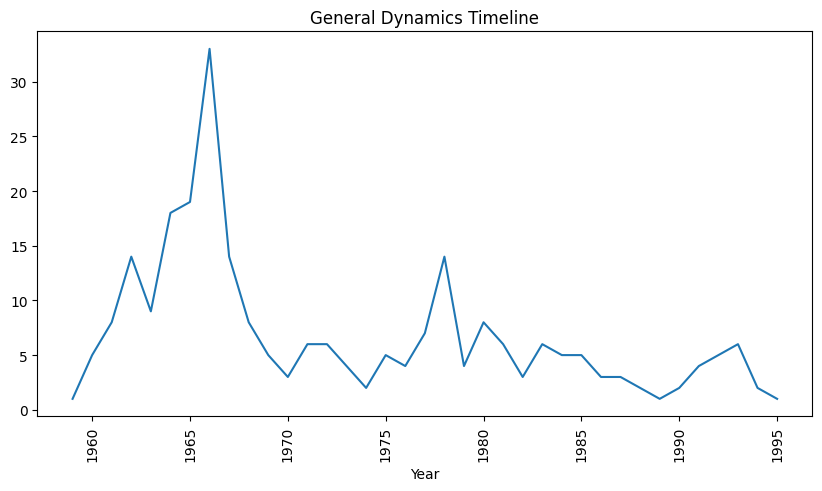

In [45]:
# General Dynamics statistics
gdynamics = usa.query('Company == "General Dynamics"')
gdynamics.groupby(['Year'])['Mission'].count().plot(
    kind='line', 
    figsize=(10,5), title='General Dynamics Timeline')

plt.xticks(rotation=90)


# Show the plot
plt.show()


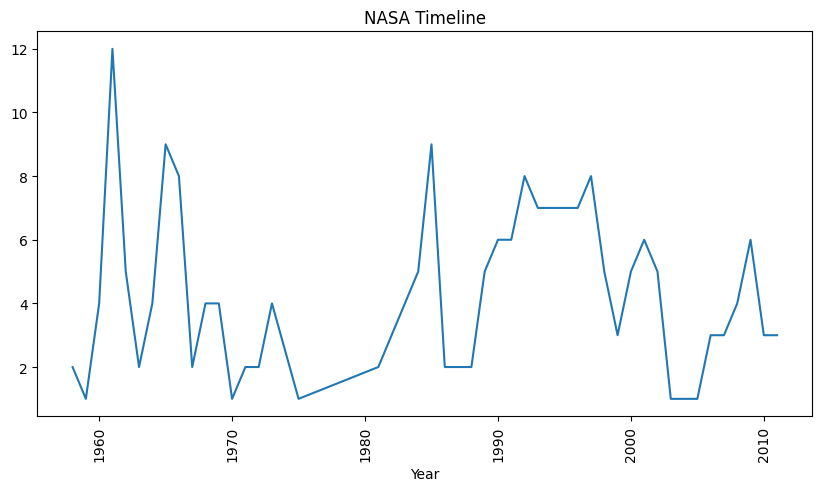

In [46]:
# Nasa Statistics
nasa = usa.query('Company == "NASA"')
nasa.groupby(['Year'])['Mission'].count().plot(
    kind='line', 
    figsize=(10,5), 
    title='NASA Timeline')

plt.xticks(rotation=90)


# Show the plot
plt.show()



<AxesSubplot: title={'center': 'Top 5 active Space agencies in Russia'}, xlabel='Companies', ylabel='Number of Missions'>

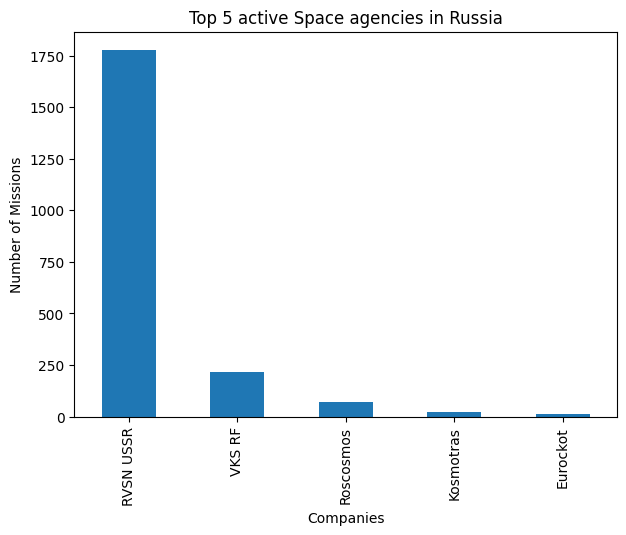

In [47]:
# Russian and Kazakhstan Top Space agencies
russia = df.loc[df['Country'].isin(['Russia', 'Kazakhstan'])].reset_index(drop=True)
russia.groupby(russia['Company'])['Mission'].count().sort_values(ascending=False).head(5).plot(
    kind='bar', 
    figsize=(7,5),
    xlabel='Companies',
    ylabel='Number of Missions',
    title='Top 5 active Space agencies in Russia')

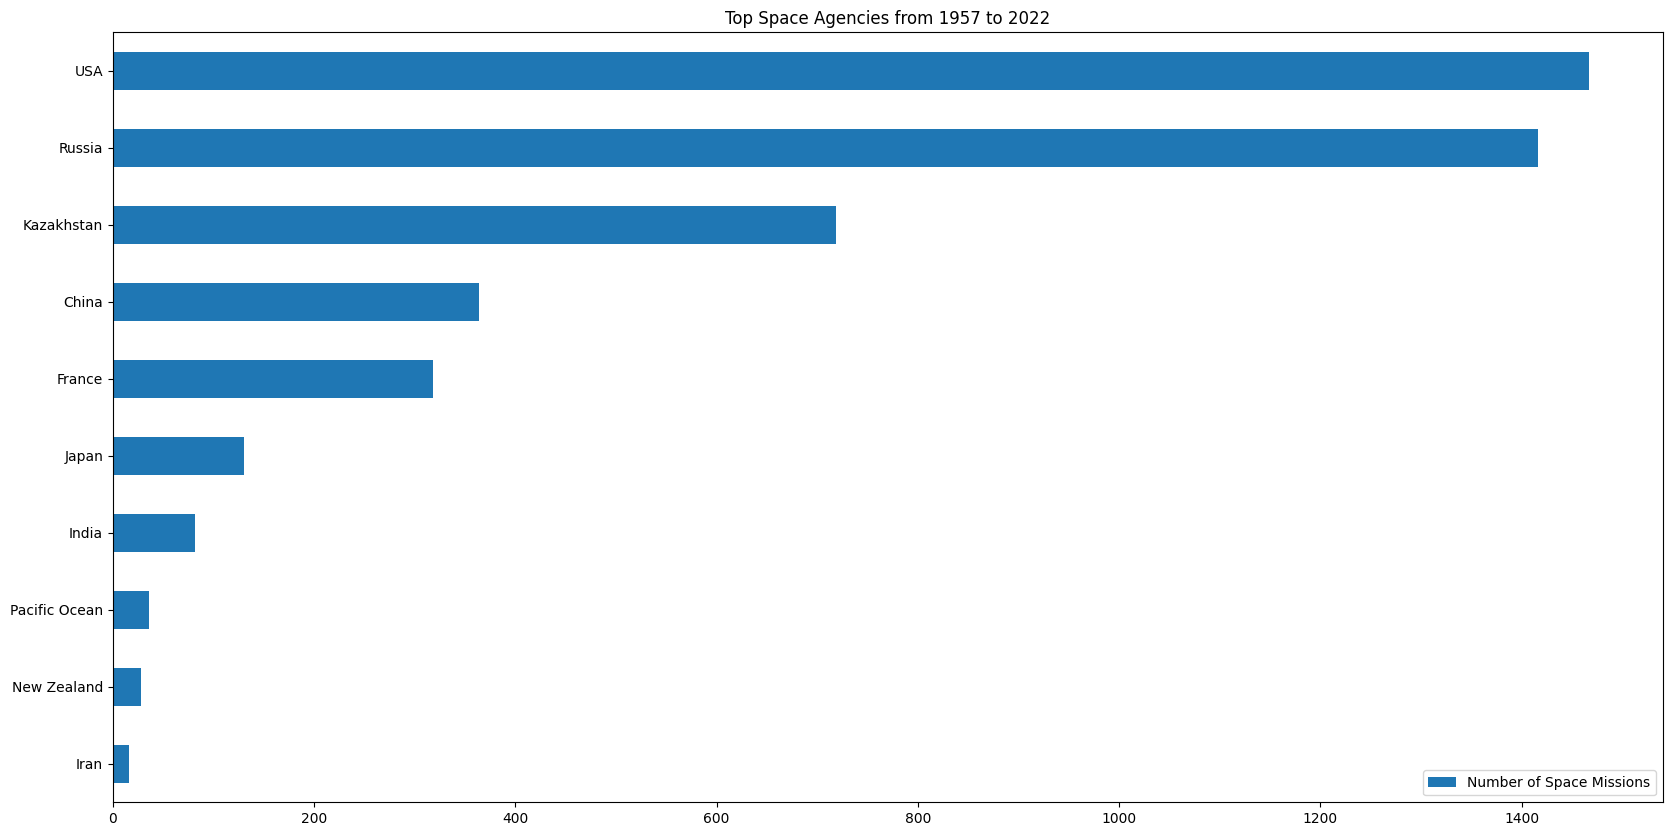

In [19]:
no_of_mission=df['Country'].value_counts().head(10).sort_values().plot(kind='barh',
                                                                       figsize=(20,10), 
                                                                       label='Number of Space Missions',
                                                                       title='Top Space Agencies from 1957 to 2022')
plt.legend()
plt.show()

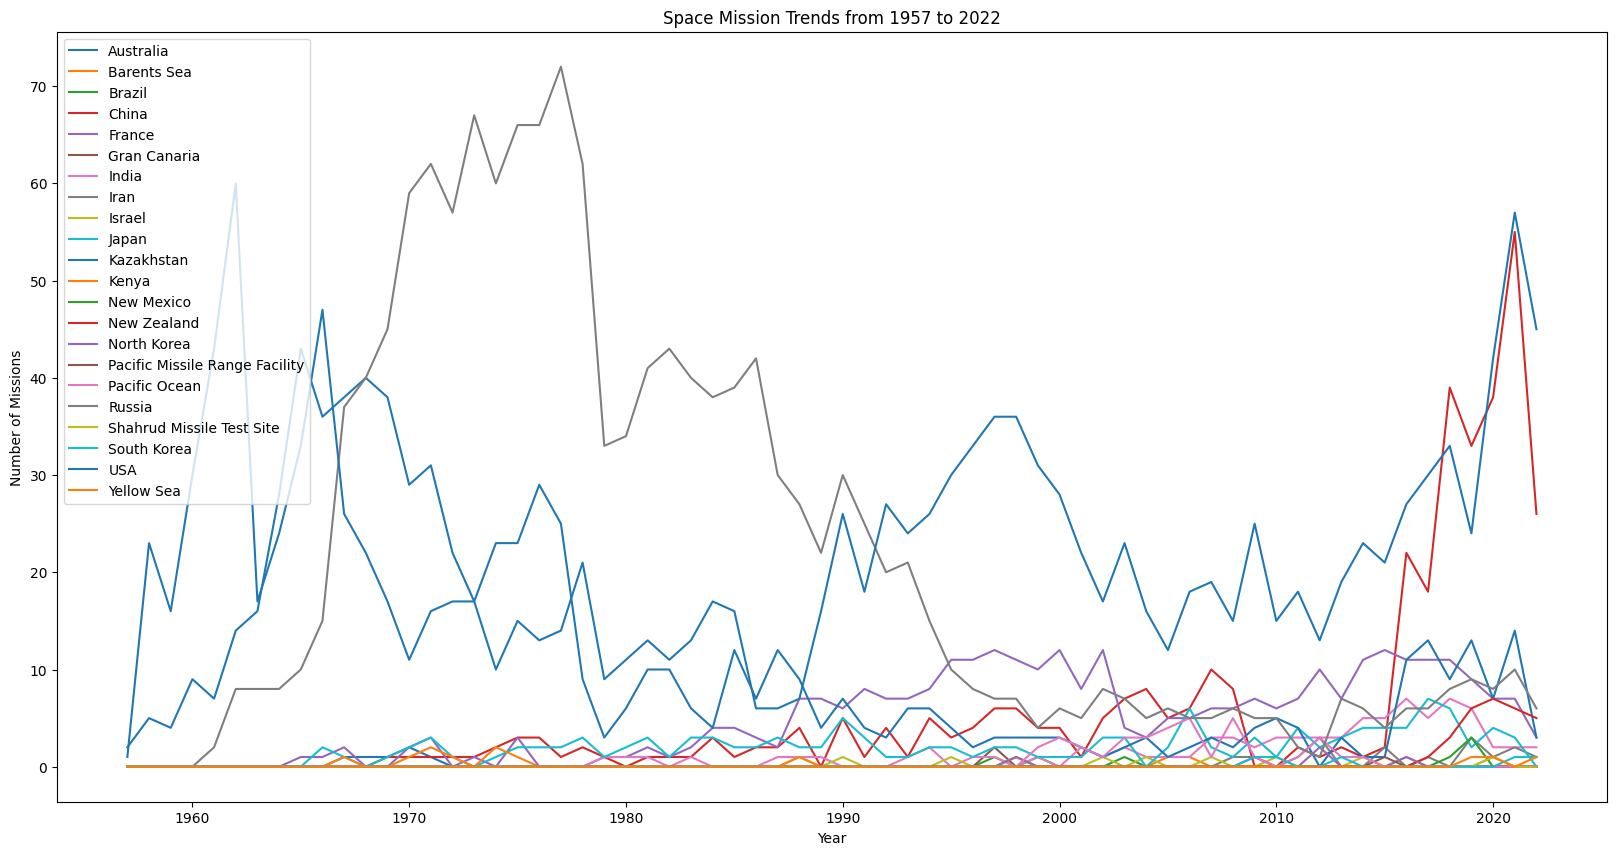

In [20]:
grouped = df.groupby(['Year', 'Country'])['Mission'].count().reset_index()

# Pivot the data so that each country has a separate column
pivot = grouped.pivot(index='Year', columns='Country', values='Mission').fillna(0)

# Plot the data
plt.figure(figsize=(20,10))
for c in pivot.columns:
    plt.plot(pivot.index, pivot[c], label=c)
plt.legend()
plt.xlabel('Year')
plt.ylabel('Number of Missions')
plt.title('Space Mission Trends from 1957 to 2022')
plt.show()

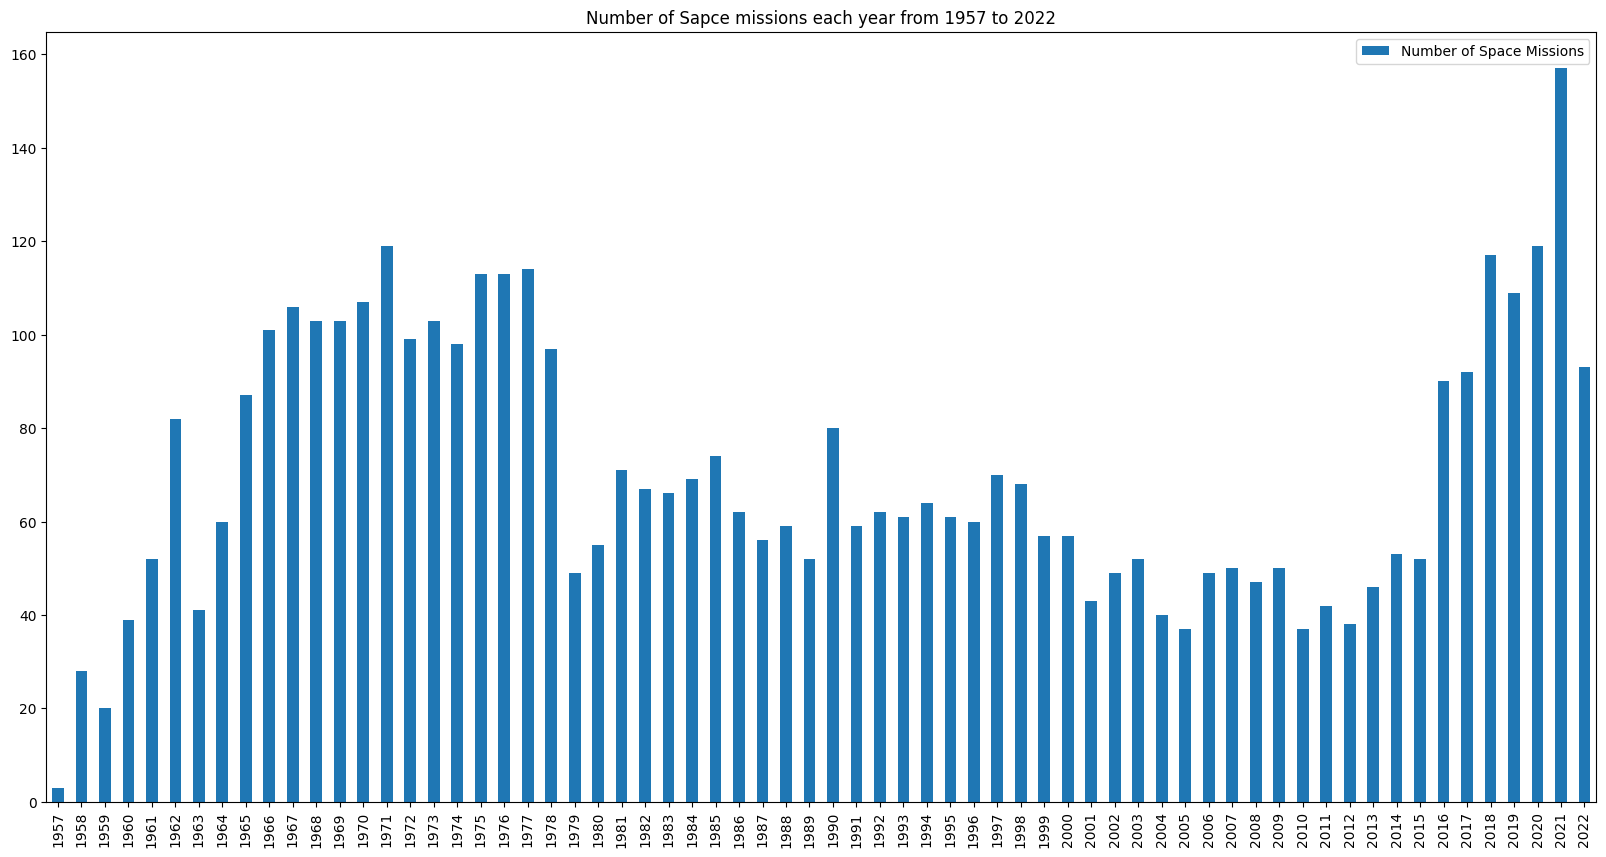

In [21]:
no_of_mission=df['Year'].value_counts().sort_index().head(100).plot(kind='bar', 
                                                                    figsize=(20,10), label='Number of Space Missions',
                                                                    title='Number of Sapce missions each year from 1957 to 2022')
plt.legend()
plt.show()


In [22]:
df['Company'].nunique()


62

In [23]:
ch_df = df[df['Location'].str.contains('Japan')].index
ch_df.shape

(130,)

In [24]:
# USA
USA = df.query('Company == "SpaceX"|Company =="Blue Origin"|Company =="US Air Force"|Company =="US Navy"').reset_index(drop=True)
USA

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus,Year,Country
0,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,2023-02-14 16:44:00,Vanguard,Vanguard TV3,Retired,0.0,Failure,1957,USA
1,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,2023-02-14 07:33:00,Vanguard,Vanguard TV3BU,Retired,0.0,Failure,1958,USA
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-03-17,2023-02-14 12:15:00,Vanguard,Vanguard 1,Retired,0.0,Success,1958,USA
3,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-04-28,2023-02-14 02:53:00,Vanguard,Vanguard TV5,Retired,0.0,Failure,1958,USA
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-05-28,2023-02-14 03:46:00,Vanguard,Vanguard SLV-1,Retired,0.0,Failure,1958,USA
...,...,...,...,...,...,...,...,...,...,...,...
376,SpaceX,"SLC-4E, Vandenberg SFB, California, USA",2022-07-11,2023-02-14 01:39:00,Falcon 9 Block 5,Starlink Group 3-1,Active,67.0,Success,2022,USA
377,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2022-07-15,2023-02-14 00:44:00,Falcon 9 Block 5,CRS SpX-25,Active,67.0,Success,2022,USA
378,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA",2022-07-17,2023-02-14 14:20:00,Falcon 9 Block 5,Starlink Group 4-22,Active,67.0,Success,2022,USA
379,SpaceX,"SLC-4E, Vandenberg SFB, California, USA",2022-07-22,2023-02-14 17:39:00,Falcon 9 Block 5,Starlink Group 3-2,Active,67.0,Success,2022,USA


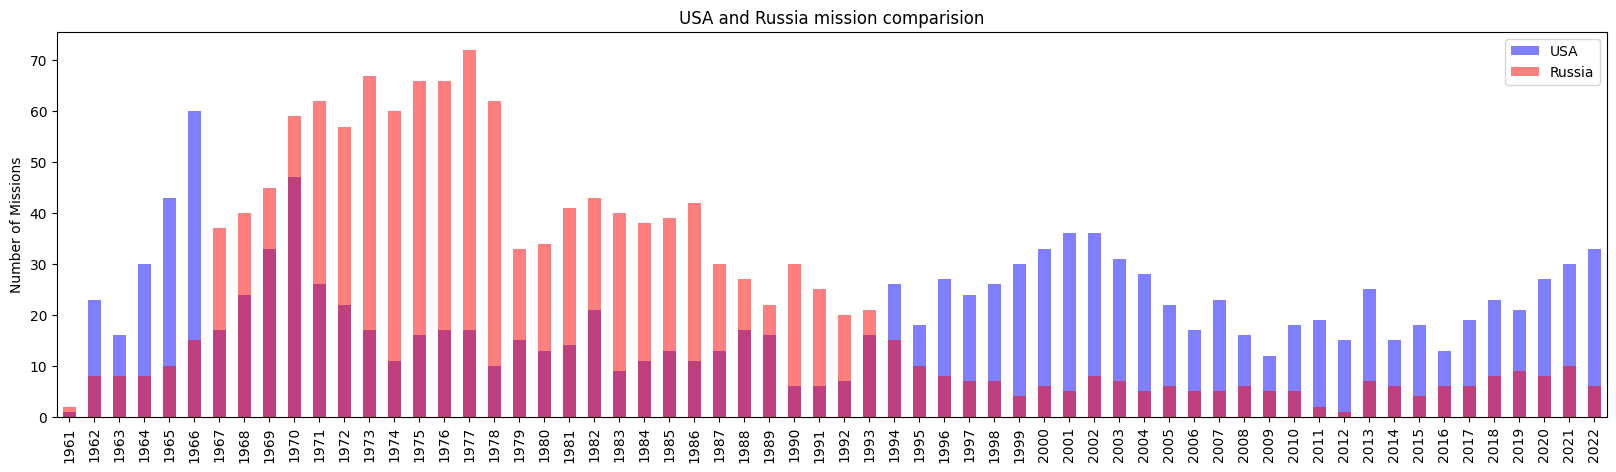

In [91]:
# Number of USA and Russian Space Missions

# Filter the data for companies from the USA
usa_df = df[df['Location'].str.contains('USA')]
plt.figure(figsize=(20, 5))
# Filter the data for companies from Russia
russia_df = df[df['Location'].str.contains('Russia')]

# Count the number of missions for each company in the USA data
usa_mission_counts = usa_df['Year'].value_counts().sort_index()


# Count the number of missions for each company in the Russia data
russia_mission_counts = russia_df['Year'].value_counts().sort_index()


# Plot a bar graph of the mission counts for the USA companies
usa_mission_counts.plot(kind='bar', color='blue', alpha=0.5, label='USA', xlabel='', ylabel='Number of Missions')

# Plot a bar graph of the mission counts for the Russia companies on the same plot
russia_mission_counts.plot(kind='bar', color='red', alpha=0.5, label='Russia', xlabel='', ylabel='Number of Missions')

# Add a legend to the plot
plt.legend()
plt.title('USA Vs Russia Space Missions comparision')

# Show the plot
plt.show()



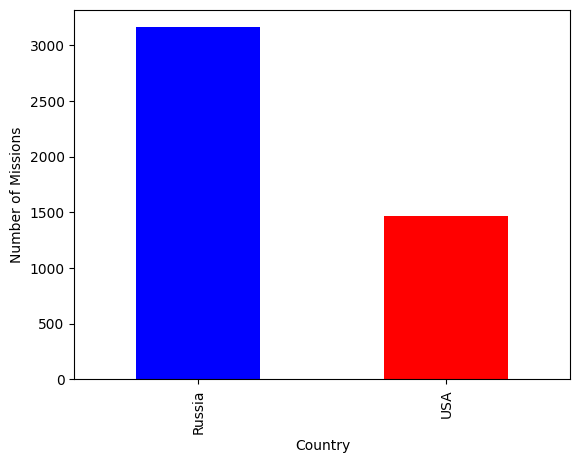

In [26]:
# Group the data by country
grouped = df.groupby(df['Location'].str.contains('USA').map({True: 'USA', False: 'Russia'}))

# Count the number of missions for each country
mission_counts = grouped['Company'].count()

# Plot a bar graph of the mission counts for each country
mission_counts.plot(kind='bar', color=['blue', 'red'], xlabel='Country', ylabel='Number of Missions')

# Show the plot
plt.show()

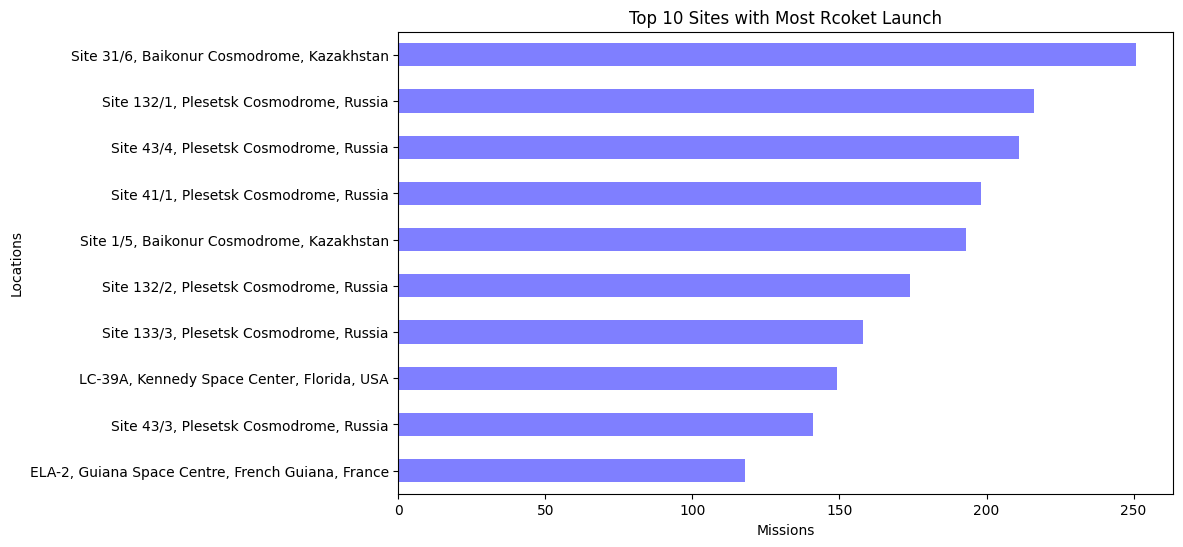

In [27]:
# Count the number of missions for each country
country_mission_counts = df['Location'].value_counts()

# Select the top 10 countries
top_10_countries = country_mission_counts.head(10)

# Sort the top 10 countries by number of missions
top_10_countries = top_10_countries.sort_values(ascending=True)

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot a bar graph of the mission counts for the top 10 countries
top_10_countries.plot(kind='barh', color='blue', alpha=0.5, xlabel='Missions', ylabel='Locations', title='Top 10 Sites with Most Rcoket Launch')

# Show the plot
plt.show()

In [107]:
df.groupby(["MissionStatus"])['Mission'].index
# Plot the results
fig, ax = plt.subplots()
grouped.pivot(index="Country", columns="Mission", values="Mission").plot(kind="bar", ax=ax)
ax.set_ylabel("Number of Missions")
plt.title("Mission Status Comparison between USA and Russia")
plt.show()

AttributeError: 'SeriesGroupBy' object has no attribute 'index'

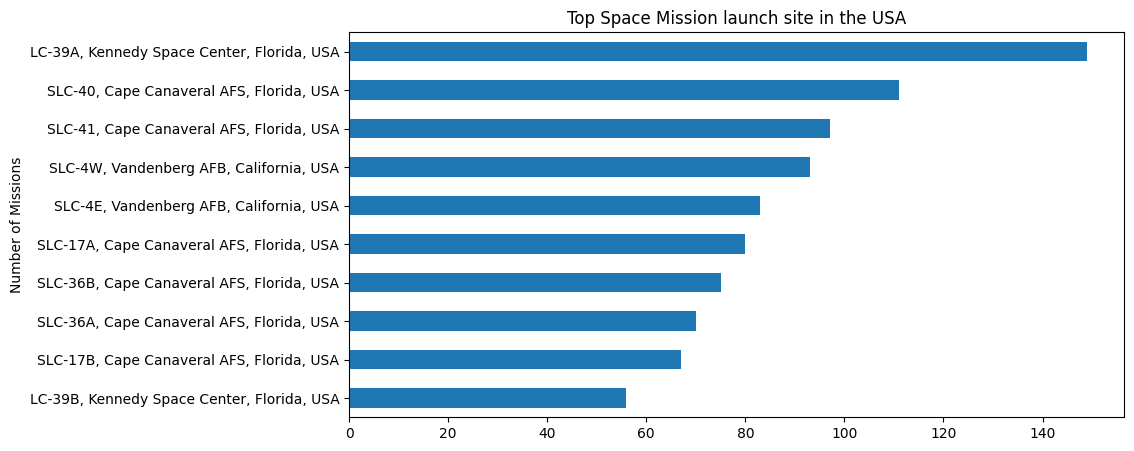

In [92]:
usa_df = df[df["Location"].str.contains("USA")]

# Use the value_counts method to determine the most common locations
most_common_locations = usa_df["Location"].value_counts().nlargest(10).sort_values()

# Plot the results
fig, ax = plt.subplots()
most_common_locations.plot(kind="barh", ax=ax, figsize=(10,5))
ax.set_ylabel("Number of Missions")
plt.title("Top Space Mission launch site in the USA")
plt.show()

In [106]:
# Filter the data to only include locations in Russia
russia_df = df.loc[df['Location'].isin(['Russia', 'Kazakhstan'])]

# Use the value_counts method to determine the most common locations
most_common_locations = russia_df["Location"].value_counts().sort_values(ascending=False).nlargest(10)
most_common_locations.head()
# Plot the results
# fig, ax = plt.subplots()
# most_common_locations.plot(kind="bar", ax=ax, figsize=(10,5))
# ax.set_ylabel("Number of Missions")
# plt.title("Top Used Space mission launch site in Russia")
# plt.show()

Series([], Name: Location, dtype: int64)

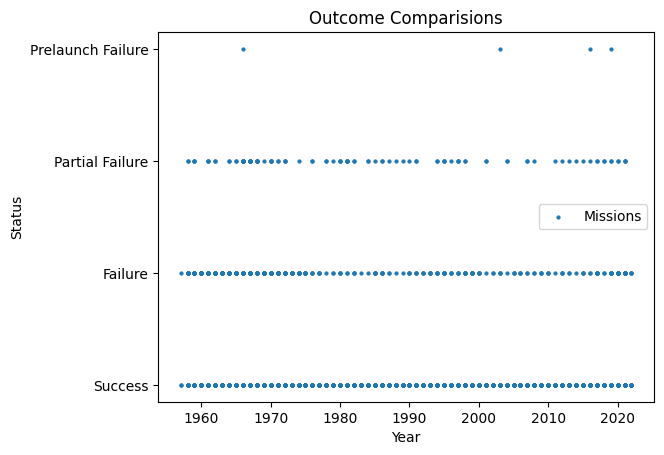

In [105]:
# Mission Status Comparision
x = df['Year']
y = df['MissionStatus']
plt.scatter(x, y, s=(7), vmin=None, vmax=None, label='Missions', linewidths=0.3)
plt.xlabel('Year')
plt.ylabel('Status')
plt.title('Outcome Comparisions')
plt.legend()
plt.show()

Text(0, 0.5, 'Models')

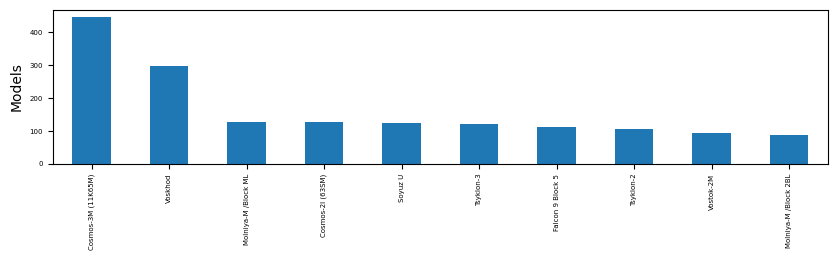

In [95]:
toproc = df['Rocket'].value_counts().head(10).plot(kind= 'bar', 
                                                                 fontsize=5, figsize= (10,2))
toproc.set_ylabel('Models')
# toproc.set_ylabel('Number of Missions')

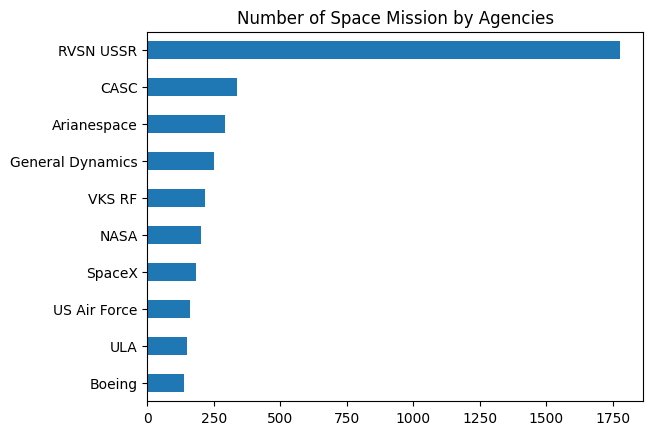

In [97]:
df['Company'].value_counts().head(10).sort_values().plot(kind='barh', title='Number of Space Mission by Agencies')
plt.show()

In [99]:
rus = df[df.Company == 'RVSN USSR']
rus

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus,Year,Country
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,2023-02-14 19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,0.0,Success,1957,Russia
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,2023-02-14 02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,0.0,Success,1957,Russia
8,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-04-27,2023-02-14 09:01:00,Sputnik 8A91,Sputnik-3 #1,Retired,0.0,Failure,1958,Russia
10,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-05-15,2023-02-14 07:12:00,Sputnik 8A91,Sputnik-3 #2,Retired,0.0,Success,1958,Russia
22,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-09-23,2023-02-14 07:40:00,Vostok,E-1 nâ Â­1 (Luna-1),Retired,0.0,Failure,1958,Russia
...,...,...,...,...,...,...,...,...,...,...,...
2632,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia",1992-07-08,2023-02-14 09:53:00,Molniya-M /Block 2BL,Cosmos 2196,Retired,0.0,Success,1992,Russia
2634,RVSN USSR,"Site 32/1, Plesetsk Cosmodrome, Russia",1992-07-13,2023-02-14 17:41:00,Tsyklon-3,Cosmos 2197 to 2202,Retired,0.0,Success,1992,Russia
2826,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia",1995-08-02,2023-02-14 23:59:00,Molniya-M /Block SO-L,Interbol 1 & Magion 4,Retired,0.0,Success,1995,Russia
2896,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia",1996-08-29,2023-02-14 05:22:00,Molniya-M /Block SO-L,"Interbol 2, Magion5 & Victor",Retired,0.0,Success,1996,Russia


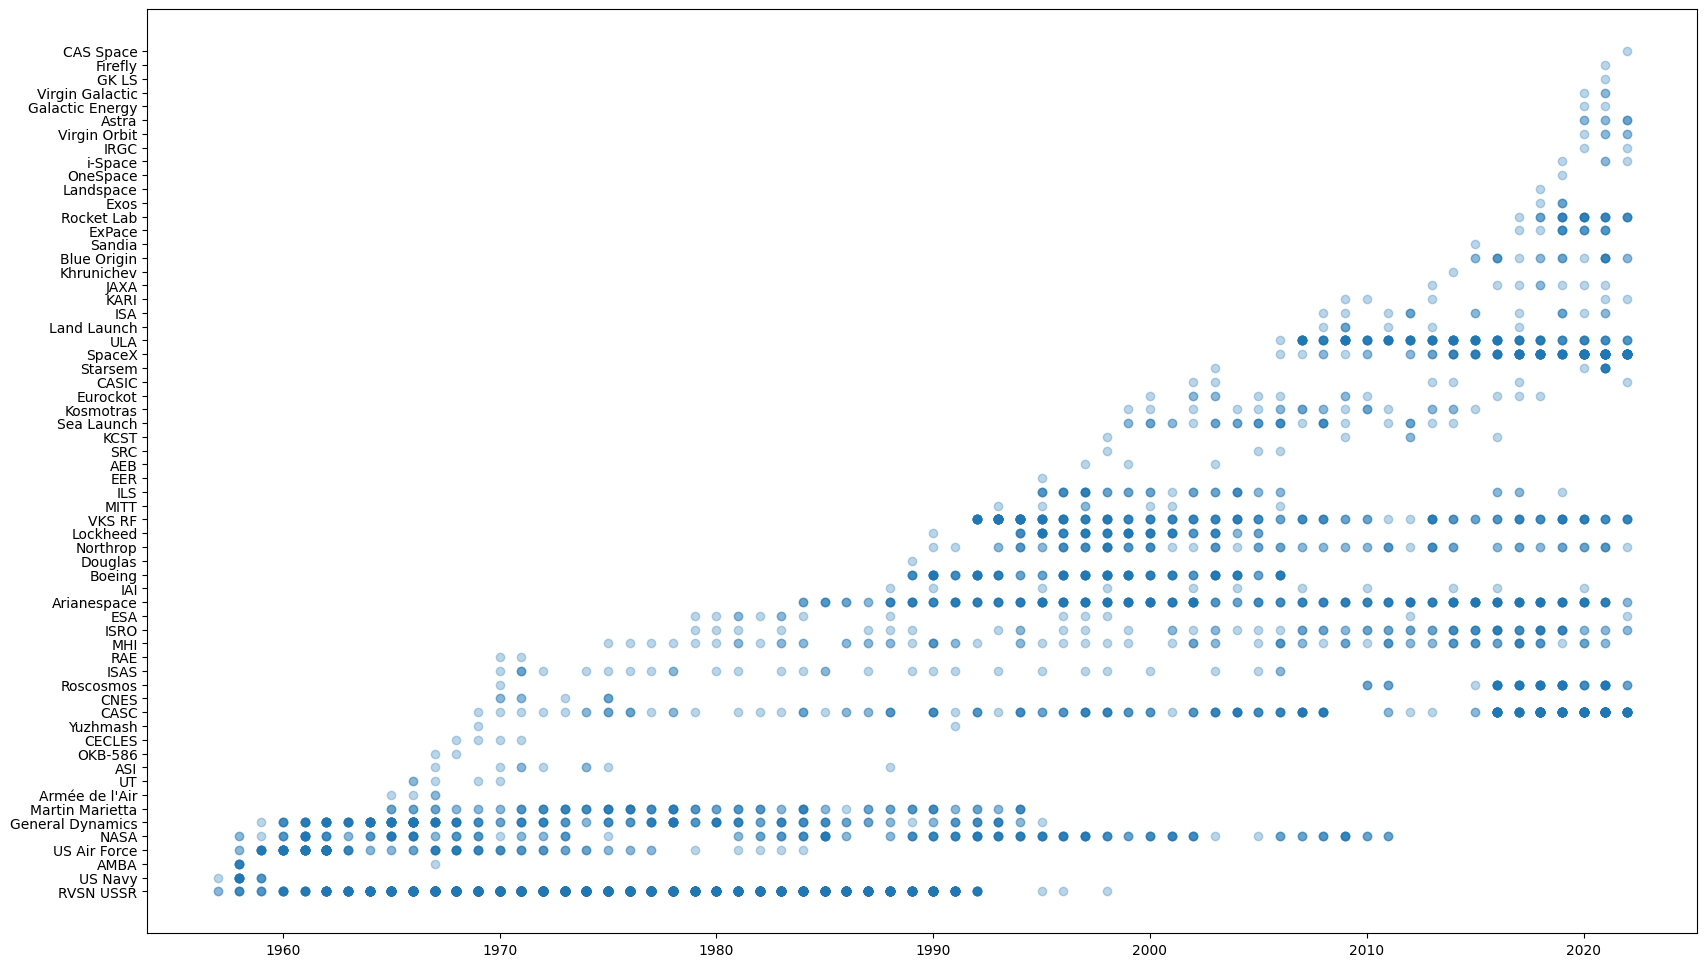

In [100]:
fig, ax = plt.subplots(figsize=(20,12))
scatter = ax.scatter(df['Year'], df['Company'], alpha=0.3)

plt.show()